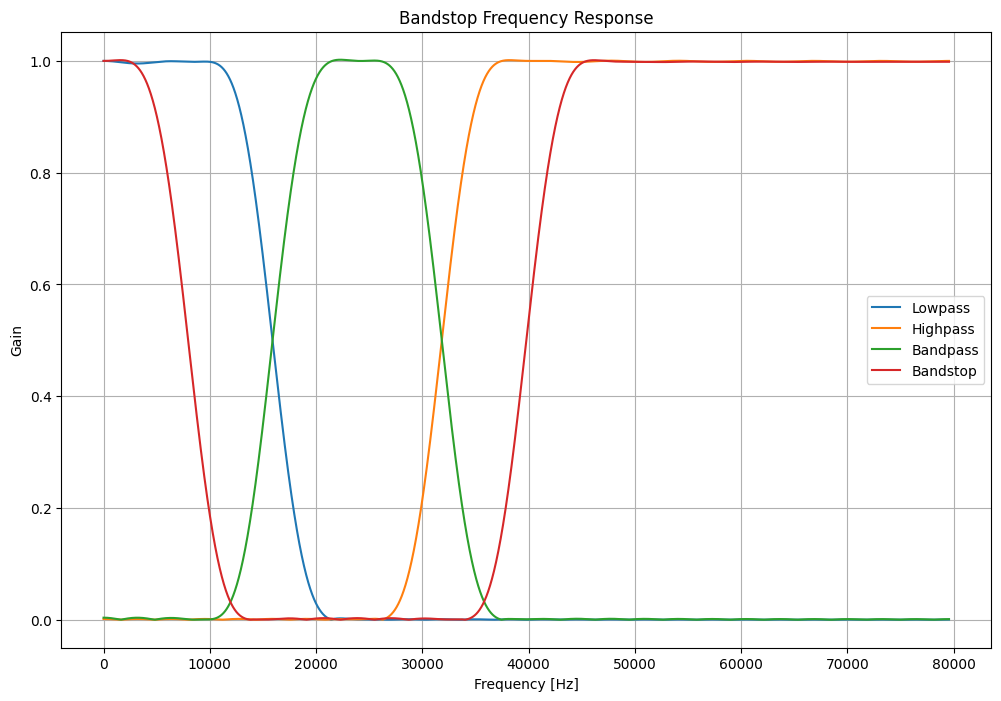

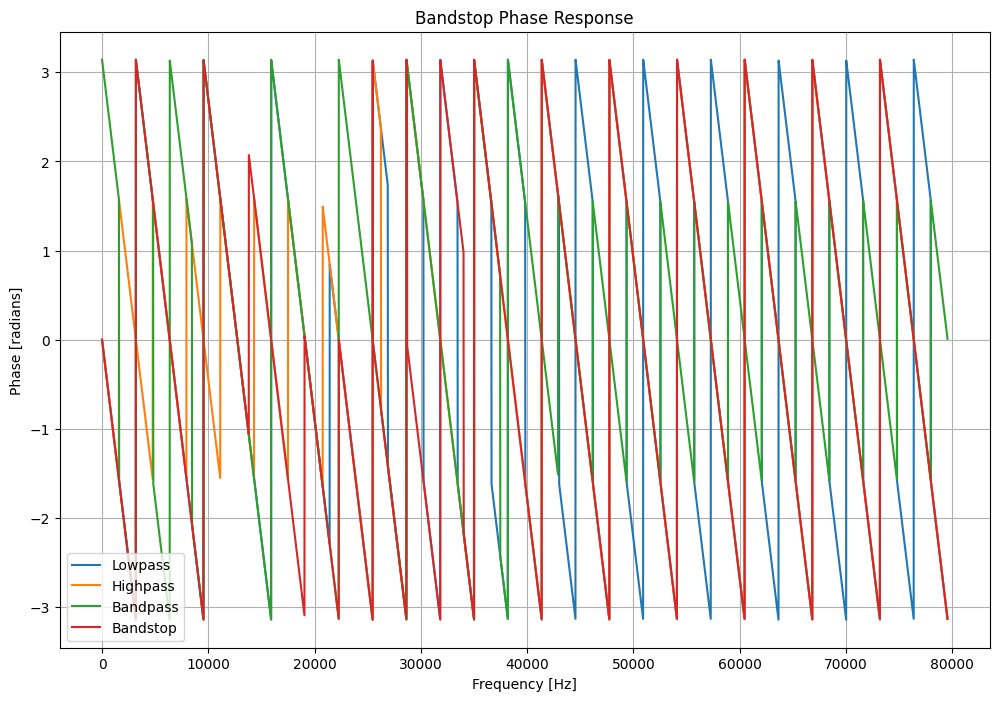

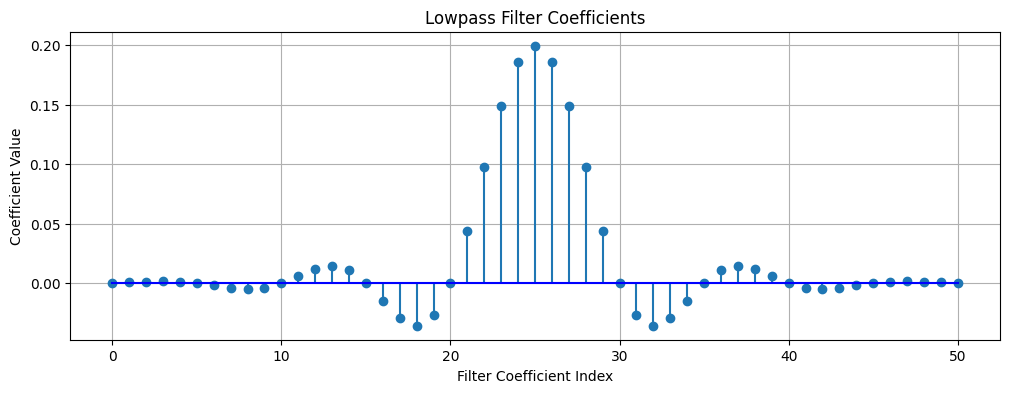

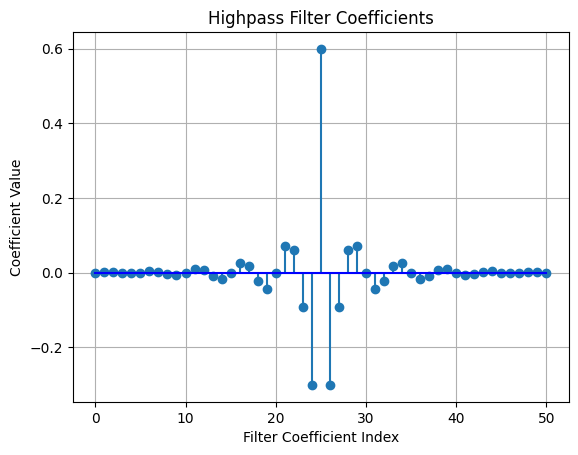

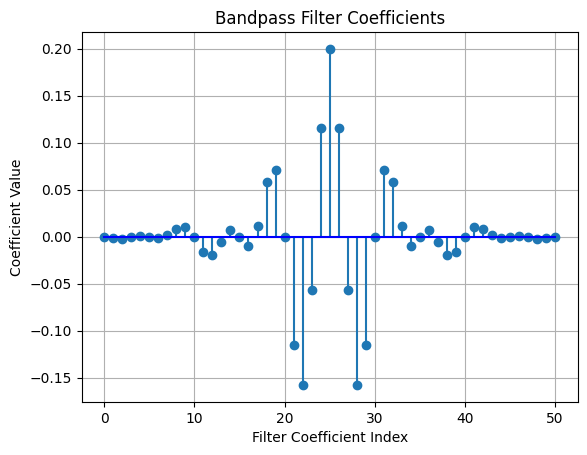

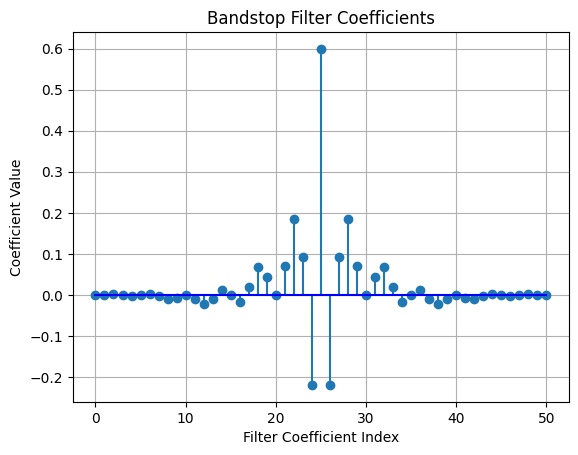

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin

# 指定滤波器的主要技术指标
fs = 1000  # 采样频率
cutoff_low = 100  # 低通滤波器截止频率
cutoff_high = 200  # 高通滤波器截止频率
cutoff_band = [100, 200]  # 带通滤波器截止频率范围
cutoff_stop = [50, 250]  # 带阻滤波器截止频率范围
filter_order = 51  # 滤波器阶数 (odd)

# 设计FIR数字滤波器
lowpass_filter = firwin(filter_order, cutoff_low, fs=fs, pass_zero=True)
highpass_filter = firwin(filter_order, cutoff_high, fs=fs, pass_zero=False)
bandpass_filter = firwin(filter_order, cutoff_band, fs=fs, pass_zero=False)
bandstop_filter = firwin(filter_order, cutoff_stop, fs=fs, pass_zero=True)

# 绘制滤波器的幅频特性曲线
def plot_filter_response(filter_coeff, title):
    w, h = freqz(filter_coeff, worN=8000, fs=fs)
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), label=title)
    plt.title(title + ' Frequency Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

# 画出滤波器的幅频特性曲线
plt.figure(figsize=(12, 8))

plot_filter_response(lowpass_filter, 'Lowpass')
plot_filter_response(highpass_filter, 'Highpass')
plot_filter_response(bandpass_filter, 'Bandpass')
plot_filter_response(bandstop_filter, 'Bandstop')

plt.show()

# 画出滤波器的相频特性曲线
def plot_phase_response(filter_coeff, title):
    w, h = freqz(filter_coeff, worN=8000, fs=fs)
    plt.plot(0.5 * fs * w / np.pi, np.angle(h), label=title)
    plt.title(title + ' Phase Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [radians]')
    plt.grid(True)
    plt.legend(loc='best')

plt.figure(figsize=(12, 8))

plot_phase_response(lowpass_filter, 'Lowpass')
plot_phase_response(highpass_filter, 'Highpass')
plot_phase_response(bandpass_filter, 'Bandpass')
plot_phase_response(bandstop_filter, 'Bandstop')

plt.show()

# 画出线性相位FIR数字滤波器的结构信号流图
def plot_filter_structure(filter_coeff, title):
    plt.stem(filter_coeff, basefmt='b')
    plt.title(title + ' Filter Coefficients')
    plt.xlabel('Filter Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.grid(True)

plt.figure(figsize=(12, 4))

plot_filter_structure(lowpass_filter, 'Lowpass')
plt.show()

plot_filter_structure(highpass_filter, 'Highpass')
plt.show()

plot_filter_structure(bandpass_filter, 'Bandpass')
plt.show()

plot_filter_structure(bandstop_filter, 'Bandstop')
plt.show()

